In [1]:
%pip install numpy matplotlib seaborn pandas scikit-learn

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata (12 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
#importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [39]:
data=pd.read_csv("SeoulBikeData.csv",encoding='cp1252')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [41]:
#escolhendo as colunas para testar o primeiro modelo
features = ['Hour',	'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)','Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']
target = 'Rented Bike Count' 

X = data[features]
y = data[target]

In [42]:
#aplica a técnica de one-hot encoding para transformar as colunas categóricas em numéricas
X = pd.get_dummies(X, columns=['Seasons','Holiday','Functioning Day'], drop_first=True)

In [43]:
#separa dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
#treina o primeiro modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
#realiza a avaliação do modelo
y_pred = model.predict(X_test)


# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"R-quadrado (R²): {r2:.2f}")

# Obter os coeficientes
coeficientes = pd.DataFrame({'Variável': X.columns, 'Coeficiente': model.coef_})
print(coeficientes.sort_values(by='Coeficiente', ascending=False))

Erro Quadrático Médio (MSE): 194288.21
Raiz do Erro Quadrático Médio (RMSE): 440.78
R-quadrado (R²): 0.53
                     Variável  Coeficiente
13        Functioning Day_Yes   948.094067
12         Holiday_No Holiday   125.622075
8               Snowfall (cm)    29.248864
0                        Hour    28.306233
3            Wind speed (m/s)    18.430806
1             Temperature(°C)    17.453699
5   Dew point temperature(°C)     9.802004
4            Visibility (10m)     0.011673
2                 Humidity(%)   -10.213309
7                Rainfall(mm)   -61.608467
6     Solar Radiation (MJ/m2)   -77.066460
9              Seasons_Spring  -144.108596
10             Seasons_Summer  -165.325493
11             Seasons_Winter  -364.784354


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


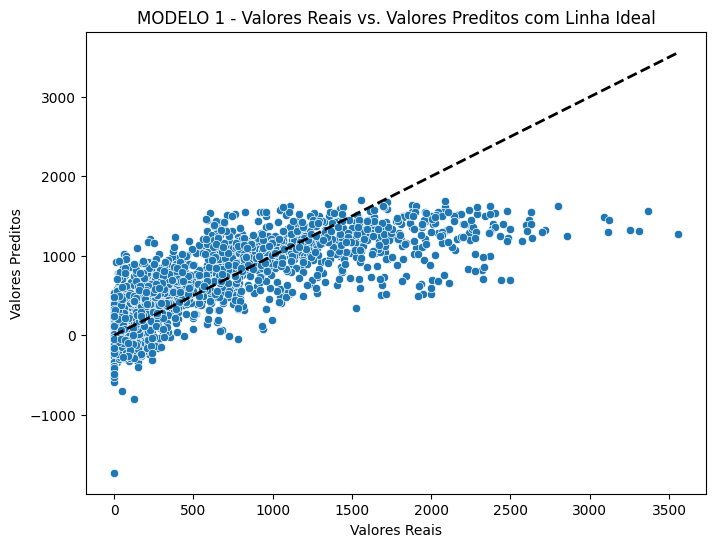

In [46]:
#plota um gráfico de dispersão com a linha ideal de predição
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("MODELO 1 - Valores Reais vs. Valores Preditos com Linha Ideal")

# Adiciona a linha diagonal (ideal)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 

plt.show()

In [47]:
#treina o quarto modelo, usando o algoritmo Random Forest
model = RandomForestRegressor(n_estimators=20, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [48]:
#realiza a avaliação do modelo
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"R-quadrado (R²): {r2:.2f}")

Erro Quadrático Médio (MSE): 61644.73
Raiz do Erro Quadrático Médio (RMSE): 248.28
R-quadrado (R²): 0.85


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


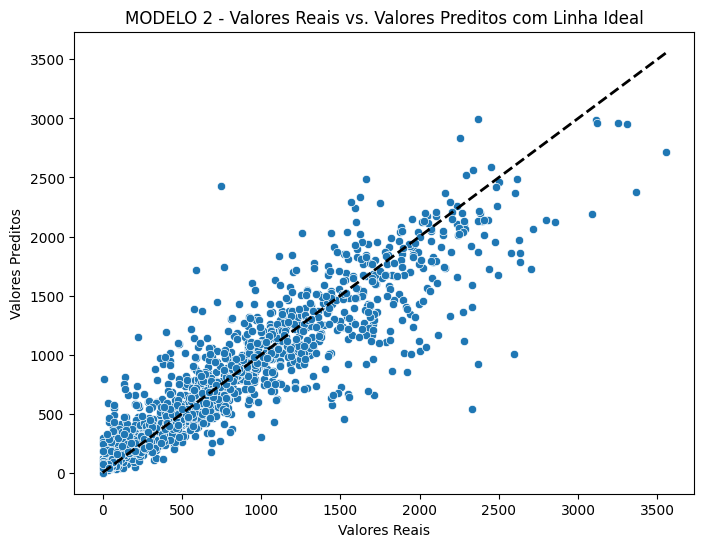

In [49]:
#plota um gráfico de dispersão com a linha ideal de predição
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("MODELO 2 - Valores Reais vs. Valores Preditos com Linha Ideal")

# Adiciona a linha diagonal (ideal)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 

plt.show()

**Análise dos Coeficientes:**

- **Variáveis mais importantes (Coeficientes altos em módulo):**
    - `Functioning Day_Yes`: Presença de dia útil impacta positivamente e fortemente o seu modelo (provavelmente número de alugueis de bikes?). Faz sentido intuitivamente, já que a demanda por bikes costuma ser maior em dias úteis.
    - `Seasons_Winter`: Impacto negativo forte. Aluguéis de bike tendem a ser menores no inverno, o que parece coerente.
    - `Seasons_Summer` e `Seasons_Spring`: Também apresentam impacto negativo, sugerindo que outras épocas do ano, como outono (que não aparece na sua lista de variáveis), podem ter maior procura.
    - `Holiday_No Holiday`: Dias sem feriado aumentam os valores da variável dependente, indicando que feriados diminuem a demanda.
- **Variáveis menos importantes (Coeficientes baixos em módulo):**
    - `Visibility (10m)`: Parece ter um impacto quase nulo. Investigue se faz sentido mantê-la no modelo ou se a forma como está sendo medida precisa ser revista.
- **Observações:**
    - `Rainfall(mm)` e `Solar Radiation (MJ/m2)`: Impacto negativo, o que é esperado.
    - Unidade das variáveis: Fique atento à unidade de medida das variáveis. `Snowfall (cm)` com coeficiente relativamente baixo pode indicar que neve não é tão determinante no seu contexto ou que a escala em centímetros mascara o real impacto.

**Passos para Melhorar o Modelo:**

1. **Análise de Outliers:** Verifique se outliers (valores muito discrepantes) estão distorcendo o modelo. Utilize boxplots ou scatterplots para identificá-los e decida se devem ser tratados (removidos, imputados ou mantidos).
2. **Transformação de Variáveis:**
    - **Variáveis Numéricas:** Experimente transformações como logaritmo, raiz quadrada ou Box-Cox para verificar se a relação com a variável dependente se torna mais linear, especialmente para as variáveis com impacto menor.
    - **Variáveis Categóricas:** Avalie se a codificação das variáveis categóricas (ex: One-Hot Encoding para `Seasons`) está adequada para o seu problema.
3. **Feature Engineering:**
    - **Crie novas variáveis:** Combine variáveis existentes ou crie novas a partir do seu conhecimento do problema. Exemplos:
        - Interação entre temperatura e dia útil (pessoas alugam mais em dias úteis quentes?).
        - Variável "clima_ruim" combinando chuva e neve.
        - Variáveis dummy para faixas de temperatura ou horários específicos.
    - **Engenharia de datas:** Extraia informações relevantes das suas datas, como dia da semana, fim de semana, feriados próximos, etc.
4. **Regularização:** Utilize técnicas de regularização (Ridge, Lasso ou Elastic Net) para reduzir a influência de variáveis menos importantes e evitar overfitting (quando o modelo se ajusta muito aos dados de treino e não generaliza bem para novos dados).
5. **Técnicas de Feature Selection:** Utilize métodos como:
    - **Forward Selection/Backward Elimination:** Adicionando/removendo variáveis iterativamente com base em métricas de performance.
    - **Recursive Feature Elimination (RFE):** Ranqueia as variáveis e remove as menos importantes recursivamente.
6. **Experimente outros modelos:** Compare o desempenho do seu modelo com outros algoritmos, como Árvores de Decisão, Random Forest ou Gradient Boosting, que podem capturar relações não lineares nos dados.

**Lembre-se:**

- Visualize seus dados: Utilize gráficos para entender melhor a relação entre as variáveis e identificar padrões.
- Valide seu modelo: Utilize técnicas de validação cruzada para ter uma estimativa mais robusta da performance do modelo em dados não vistos.
- Itere!: A construção de um bom modelo é um processo iterativo. Experimente diferentes abordagens, avalie os resultados e ajuste seu modelo até atingir o desempenho desejado.